# ABC Analysis
According to (Heizer, Render & Munson, n.d.) ABC analysis is a method to classify many products into three groups (A, B, dan C) based on *annual dollar volume* which is the multiply of annual demand with price per unit. Below is an explanation of each group in the ABC analysis:

**1. Class A**

This class has the highest annual dollar volume with a 15% of all unique products. It also has a 70-80% annual dollar volume cumulative percentage from all products.
    
    
**2. Class B**

This class has a medium annual dollar volume with a 30% of all unique products. It also has a 15-25% annual dollar volume cumulative percentage from all products.


**3. Class C**

This class has a low annual dollar volume with a 55% of all unique products. It also has a 5% annual dollar volume cumulative percentage from all products.

<img src="https://user-images.githubusercontent.com/61647791/128857660-f26245cf-20d5-44e4-94e8-60a3f156b343.PNG" />

*Source: Operations Management Sustainability and Supply Chain Management (12th Edition) by Jay Heizer, Barry Render, Chuck Munson*

In this session, we will study how to classify a product based on total sales and revenue using ABC analysis. The Data that we used is from Udemy online course with the title: **RA: Data Science and Supply Chain Analytics. A-Z with Python. Haytham Omar, Consultant-Supply chain**  

In [1]:
#importing library
import pandas as pd
import numpy as np

Below is the data containing a product that sold in a retail store with average annual demand and revenue. Assume that the "total_revenue" column is an annual dollar volume.

In [2]:
#load dataset using pandas
retail = pd.read_csv("retail.csv")
retail.head()

,Description,total_sales,total_revenue
0,DOORMAT UNION JACK GUNS AND ROSES,167,1071.25
1,3 STRIPEY MICE FELTCRAFT,662,1241.10
2,4 PURPLE FLOCK DINNER CANDLES,324,495.16
3,50'S CHRISTMAS GIFT BAG LARGE,1885,2272.25
4,ANIMAL STICKERS,385,80.85


### 1. Calculate Cumulative Percentage of Annual Dollar Volume 
Before we do that, let's sort the data according to the total_revenue column from higher to lower.

In [3]:
#ensure that there are no duplicate value (unique product)
retail.drop_duplicates(inplace=True)

#sort the data according to the total_revenue column 
retail.sort_values("total_revenue", ascending=False, inplace=True)

In [4]:
retail.head()

,Description,total_sales,total_revenue
3769,REGENCY CAKESTAND 3 TIER,24139,277656.25
5047,WHITE HANGING HEART T-LIGHT HOLDER,91757,247048.01
3129,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
2860,Manual,9391,151777.67
2392,JUMBO BAG RED RETROSPOT,74224,134307.44


In [5]:
#calculate the percentage of revenue
retail["percentage_revenue"] = retail["total_revenue"]/retail["total_revenue"].sum() * 100

#calculate the cumulative percentage of revenue using .cumsum() 
retail["cum_percentage_revenue"] = retail["percentage_revenue"].cumsum()

retail.head()

,Description,total_sales,total_revenue,percentage_revenue,cum_percentage_revenue
3769,REGENCY CAKESTAND 3 TIER,24139,277656.25,1.598040,1.598040
5047,WHITE HANGING HEART T-LIGHT HOLDER,91757,247048.01,1.421875,3.019915
3129,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60,0.969620,3.989535
2860,Manual,9391,151777.67,0.873550,4.863085
2392,JUMBO BAG RED RETROSPOT,74224,134307.44,0.773001,5.636086


### 2. Grouping Data According ABC Class
Next, we want to classify the products according to the criteria that I mentioned before. I will create a function to classify the products:
- Class A with a cumulative percentage from 0 to 80%
- Class B with a cumulative percentage from 80 to 95%
- Class C with a cumulative percentage from 95 to 100%

In [6]:
#create a classify function first
def abc(x):
    if 0<x<=80:
        cat="A"
        
    elif 80<x<=95:
        cat="B"
        
    else:
        cat="C"
        
    return cat

In [7]:
#Now we can apply the function above to percentage_cum_revenue  using map() function from pandas
#Create a new column, named category

retail["category"] = retail["cum_percentage_revenue"].apply(abc)

retail.head()

,Description,total_sales,total_revenue,percentage_revenue,cum_percentage_revenue,category
3769,REGENCY CAKESTAND 3 TIER,24139,277656.25,1.598040,1.598040,A
5047,WHITE HANGING HEART T-LIGHT HOLDER,91757,247048.01,1.421875,3.019915,A
3129,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60,0.969620,3.989535,A
2860,Manual,9391,151777.67,0.873550,4.863085,A
2392,JUMBO BAG RED RETROSPOT,74224,134307.44,0.773001,5.636086,A


We can see how many products in each category

In [8]:
retail["category"].value_counts()

C    2784
B    1362
A    1137
Name: category, dtype: int64

In [9]:
retail["category"].value_counts()/retail["category"].value_counts().sum() * 100

C    52.697331
B    25.780806
A    21.521863
Name: category, dtype: float64

We also can visualize the result using Matplotlib or Seaborn library

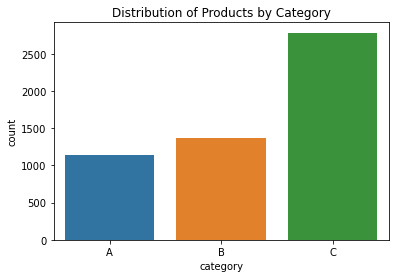

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data =retail, x="category")
plt.title("Distribution of Products by Category")
plt.show()

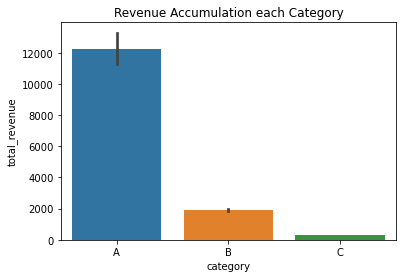

In [12]:
sns.barplot(x="category",y="total_revenue",data=retail)
plt.title("Revenue Accumulation in each Category")
plt.show()

From the visualization above, category A gives the highest revenues although the number of products is fewest. Therefore, we should give priority to products in category A over the other categories.